In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas

In [3]:
#Variaveis estaticas

#Temperaturas do ambiente, recipiente e do cafe, respectivamente, em ºC
Ta = 24
Tc = 96
Tr = 24

#Dimensões da caneca, r (raio interno), R(raio externo), rc(raio intermediario) e h(altura) em metros:
r = 0.04
R = 0.05
rc = (r + R) / 2
h = 0.1

#Massa do cafe e do recipiente em gramas, respectivamente:
mc = 250
mr = 200

#Calores especificos do cafe e do recipiente, em caloria/(grama*celsius)
cc = 1.1
cr = 0.16

#Condutividade termica do vidro em W/m⋅𝐾
K = 0.8

#coeficiente de convecção do ar em 𝑊/(𝑚^2⋅𝐾)
hs = 24




In [4]:
def modelo(l, t):
    Tc = l[0]
    Tr = l[1]
    Ti = Tc
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(rc / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/rc) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (-1 / (mc * cc)) * (qs + qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]
    

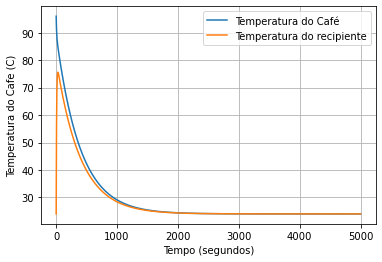

In [5]:
lista_tempo = np.arange(0, 5000, 2)
ci = [Tc, Tr]

x = odeint(modelo, ci, lista_tempo)
x = odeint(modelo, ci, lista_tempo)
tCafe = x[:,0]
tRecipiente = x[:,1]

plt.plot(lista_tempo, tCafe, label='Temperatura do Café')
plt.plot(lista_tempo, tRecipiente, label='Temperatura do recipiente')

plt.legend()
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

In [6]:
def modelo2(l, t, R):
    Tc = l[0]
    Tr = l[1]
    Ti = Tr
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(rc / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/rc) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (-1 / (mc * cc)) * (qs + qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]

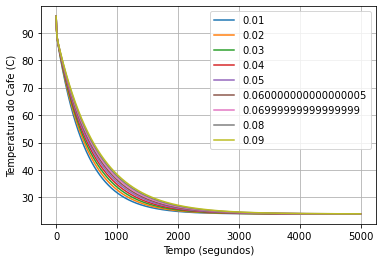

In [18]:
lista_espessura = np.arange(0.01, 0.1, 0.01)
lista_odeint = []

for i in lista_espessura:
    x = odeint(modelo2, ci, lista_tempo, args=(R+i,))
    lista_odeint.append(x[:,0])
    plt.plot(lista_tempo, x[:,0], label = i)


plt.legend()
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

In [19]:
def conclusivo(lo, lt):
    temp = 60
    
    lista_lo = list(lo)
    lista_lt = list(lt)
    index = int()
    
    for i in lista_lo:
        if i <= temp:
            index = lista_lo.index(i)
            break
    return lista_lt[index]

for i in lista_odeint:
    print(conclusivo(i, lista_tempo))

282
300
316
332
346
360
372
384
396


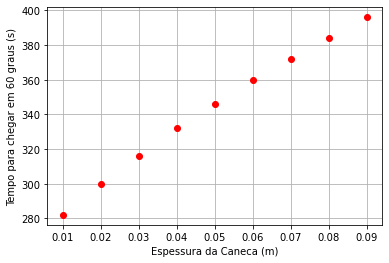

In [22]:
lista_tempo_temp = []
for i in lista_odeint:
    lista_tempo_temp.append(conclusivo(i, lista_tempo))
    
plt.plot(lista_espessura, lista_tempo_temp, 'ro')
plt.xlabel("Espessura da Caneca (m)")
plt.ylabel("Tempo para chegar em 60 graus (s)")
plt.grid(True)